In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from gensim.models import Word2Vec
# from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import os.path
import yaml

In [2]:
def read_yaml(yaml_file):
    '''read yaml file 
    inpput - config file name and path'''
    data_dict = None
    with open(yaml_file) as f:
        data_dict = yaml.safe_load(f)
    return data_dict

In [3]:
# read the data config file
yaml_file_name = 'data_config.yaml'
data_dict = read_yaml(yaml_file_name)

In [4]:
# save the config params for data
test_percent = int(data_dict['test_percent'])
author_data_choice = data_dict['author_data_choice']
data_augmentation = data_dict['data_augmentation']

In [5]:
# print the config received for data
print(" ====== data config ======= ")
print("test percent : ", test_percent , type(test_percent))
print("author_data_choice : ", author_data_choice, type(author_data_choice))
print("data_augmentation : ", data_augmentation, type(data_augmentation))

 ====== data config ======= 
test percent :  30 <class 'int'>
author_data_choice :  True <class 'bool'>
data_augmentation :  True <class 'bool'>


In [6]:
# read the SVM config file
yaml_file_name = 'SVM_classifier_config.yaml'
data_dict = read_yaml(yaml_file_name)


In [7]:
# save the config params for SVM
kernel_name_SVM = data_dict['kernel_name_SVM']
balanced_SVM = data_dict['balanced_SVM']


In [8]:
# print the config received for SVM
print("======== SVM Classifier config ==========")
print("kernel_name_SVM : ", kernel_name_SVM, type(kernel_name_SVM))
print("balanced_SVM : ", balanced_SVM, type(balanced_SVM))

======== SVM Classifier config ==========
kernel_name_SVM :  sigmoid <class 'str'>
balanced_SVM :  False <class 'bool'>


In [9]:
# read the MLP config file
yaml_file_name = 'MLP_classifier_config.yaml'
data_dict = read_yaml(yaml_file_name)

In [10]:
# save the config params for MLP, as number of neruons in layer mentioned as (,,) we need to convert them to list to give it to further MLP function
hidden_layer_sizes_MLP = []
layer_sizes = data_dict['hidden_layer_sizes_MLP'].split(",") # split on ","
for i in range(len(layer_sizes)):
    size = layer_sizes[i]
    if i ==0:
        hidden_layer_sizes_MLP.append(int(size[1:])) # for first remove ( in (no_neuron and append to list
    elif i == len(layer_sizes)-1:
        hidden_layer_sizes_MLP.append(int(size[:-1])) # for last remove ) in no_neuron) and append to list
    else:
         hidden_layer_sizes_MLP.append(int(size))  #  append no_neuron to list
hidden_layer_sizes_MLP = tuple(hidden_layer_sizes_MLP) 

In [11]:
# save the config hyperparams for MLP
learning_rate_init_MLP=data_dict['learning_rate_init_MLP']
max_iter_MLP=data_dict['max_iter_MLP']


In [12]:
# print the config received for MLP
print("========= MLP classifier config =========== ")
print("hidden_layer_sizes_MLP : " , hidden_layer_sizes_MLP, type(hidden_layer_sizes_MLP))
print("learning_rate_init_MLP : ", learning_rate_init_MLP, type(learning_rate_init_MLP))
print("max_iter_MLP : ", max_iter_MLP, type(max_iter_MLP))

========= MLP classifier config =========== 
hidden_layer_sizes_MLP :  (64, 32) <class 'tuple'>
learning_rate_init_MLP :  0.01 <class 'float'>
max_iter_MLP :  100 <class 'int'>


In [13]:
# read yaml config file for test 
yaml_file_name = 'test_config.yaml'
data_dict = read_yaml(yaml_file_name)

In [14]:
# save the config params for test
row_from_author_data = data_dict['row_from_author_data']
test_question = data_dict['test_question']


In [15]:
# print the params for test 
print("===== test config ========" )
print("row_from_author_data : ", row_from_author_data , type(row_from_author_data))
print("test_question : ", test_question, type(test_question))

===== test config ========
row_from_author_data :  [5, 15, 150] <class 'list'>
test_question :  how bad is covid pandemic <class 'str'>


In [16]:
# read yaml config file for word2vec 
yaml_file_name = 'word2vec_config.yaml'
data_dict = read_yaml(yaml_file_name)

In [17]:
# save the config params for word2vec
vector_size  = data_dict['vector_size']
window = data_dict['window']
min_count = data_dict['min_count']
sg = data_dict['sg']
train_new_word2vec = data_dict['train_new_word2vec']
tsne_word = data_dict['tsne_word']

In [18]:
# print the params for word2vec
print(" ====== word2vec model config -=====")
print("vector_size : ", vector_size, type(vector_size))
print("window : ", window, type(window))
print("min_count : ",min_count , type(min_count))
print("sg : ", sg, type(sg))
print("train_new_word2vec : ", train_new_word2vec, type(train_new_word2vec))
print("tsne_word : ", tsne_word, type(tsne_word))

 ====== word2vec model config -=====
vector_size :  700 <class 'int'>
window :  3 <class 'int'>
min_count :  3 <class 'int'>
sg :  0 <class 'int'>
train_new_word2vec :  False <class 'bool'>
tsne_word :  treatment <class 'str'>


In [19]:
def SVM_classifier(kernel_name, class_balanced = False):
    '''invokes appropriate SVM classfier
    input - kernel to use, whether to balance class'''
    if class_balanced == True:
        # SVC with particular kernal and class balance = True
        SVC1 = SVC(kernel=kernel_name, class_weight='balanced')
        return SVC1
    else:
        # SVC with particular kernal and class balance = False(default)
        SVC1 = SVC(kernel=kernel_name)
        return SVC1

In [20]:
def get_accuracy_score(X,y, classifier='SVC'):
    '''get accuracy for mentioned classifier 
    input - input, correct output, classifier (default - SVC) - SVC or MLP'''
    if (classifier=='SVC'):
        # predict using SVC and input
        predict = svcclassifier.predict(X)
        # return accuracy score
        return accuracy_score(y, predict)
    if (classifier=='MLP'):
        # predict using MLP and input
        predict = mlpclassifier.predict(X)
        # return accuracy score
        return accuracy_score(y, predict)
        

In [21]:
def test_on_data(sample, classifier='SVC'):
    '''return prediction for test question using classifier 
    input - test sample question, classifier'''
    # create the word2vec representation of sentence
    list1 = sample.split(" ") # split on space to create token
    vec = []
    for token in list1:
        # search for token and it's representation in word2vec saved model
        if token in sg_w2v_model.wv.index_to_key:
            vec.append(sg_w2v_model.wv[token])
        else :
            # if token is not found append zeros
            vec.append(np.zeros(vector_size))
#         print(len(vec[5]))
#         break
    # take mean of all words representation
    test_ex = (np.mean(vec, axis=0)).tolist()
    if (classifier=='SVC'):
        # predict using SVC classifier 
        return svcclassifier.predict([test_ex])[0]
    if (classifier=='MLP'):
        # predict using MLP classifier
        return svcclassifier.predict([test_ex])[0]

In [22]:
def get_trained_data(augmented):
    '''get data for training
    input - augmented param as boolean'''
    if (augmented==True):
         # read augmented trained data if augmented = True 
        df_train = pd.read_csv("data_generated/train_data_augmented.csv")
        print("train data shape : ", df_train.shape)
        return df_train
    else:
         # read original non-augmented trained data if augmented = False 
        df_train = pd.read_csv("data_generated/train_data.csv")
        print("train data shape : ", df_train.shape)
        return df_train

In [23]:
def get_test_data(author=True):
    '''get test data, source generated to author generated
    input - author generated boolean'''
    if (author==True):
        # if author = True get both test data and author generated test data
        df_test = pd.read_csv("./data_generated/test_data.csv")
        df_test_author = pd.read_csv("./data_generated/test_data_author_generated.csv")
        return df_test, df_test_author
    else:
        # if author = False get only test data
        df_test = pd.read_csv("./data_generated/test_data.csv")
        return df_test, None

In [24]:
def print_results_on_data(row_from_author_data, classifier='SVC'):
    '''print the predictions for data 
    input - row numbers from author generated data, classifier to use'''
    for i in row_from_author_data:
        # if row more than number of rows in author generated data set it max row number
        if (i > 248):
            i = 248
        if author_data_choice == True:
            # if author choice true , get data for that row number and predict using given classifier, default, SVC
            sample = df_test_author['Question'].iloc[i]
            print("Question : ", df_test_author['Question'].iloc[i])
            print("predicted : ", test_on_data(sample , classifier))
            print("correct : " , df_test_author['Category'].iloc[i])

## word2vec model

In [25]:
# get training data 
df_train = get_trained_data(augmented=data_augmentation)
print("train data shape : ", df_train.shape)

train data shape :  (2887, 3)
train data shape :  (2887, 3)


In [26]:
# get test data
df_test, df_test_author = get_test_data(author_data_choice)
print("test data shape : ", df_test.shape)
if author_data_choice==True:
    print("author test data shape : ", df_test_author.shape)

test data shape :  (691, 2)
author test data shape :  (249, 2)


In [27]:
# copy the train data and combine it with test and author test data if specified
df_all = df_train.copy()
df_all = df_all.append(df_test)
if author_data_choice == True:
    df_all = df_all.append(df_test_author)
# df_all

In [28]:
# generate tokens from sentences for combined data
df_all['Question'] = df_all['Question'].astype(str)
df_all['stemmed_tokens'] = df_all['Question'].str.split( " ")
# df_all

In [29]:
# generate tokens from sentences for train data

df_train['stemmed_tokens'] = df_train['Question'].str.split( " ")
# df_train

In [30]:
# generate tokens from sentences for test data

df_test['Question'] = df_test['Question'].astype(str)
df_test['stemmed_tokens'] = df_test['Question'].str.split(" " )
# df_test

In [31]:
# generate tokens from sentences for author test data

if author_data_choice==True:
    df_test_author['Question'] = df_test_author['Question'].astype(str)
    df_test_author['stemmed_tokens'] = df_test_author['Question'].str.split(" " )
# df_test_author

In [32]:
print("data shape for word2vec input : " , df_all.shape)
# list(df_all['stemmed_tokens'].values)

data shape for word2vec input :  (3827, 4)


In [33]:
# word2vec model filename to save model or saved model that needs to be retrieved
word2vec_model_file = './data_generated/word2vec_' + str(vector_size) + '.model'
# if we want to train new word2vec model
if (train_new_word2vec==True):
    print("training word2vec model and saving to ", word2vec_model_file)
    stemmed_tokens = list(df_all['stemmed_tokens'].values)
    # Train the Word2Vec Model
    w2v_model = Word2Vec( stemmed_tokens, min_count = min_count, vector_size  = vector_size , window = window, sg=sg) #declare
    w2v_model.build_vocab(stemmed_tokens, progress_per=10000) # build vocab for it
    w2v_model.train(stemmed_tokens, total_examples=w2v_model.corpus_count, epochs=500, report_delay=1) # train using hyperparams
    # w2v_model = Word2Vec(stemmed_tokens,min_count = min_count, vector_size  = vector_size, window=window )
    w2v_model.save(word2vec_model_file) #save the generated file
    
elif  (os.path.exists(word2vec_model_file)==False) and (train_new_word2vec==False):
    # if we don't want to train athe model but we don't have saved file for that particular word2vec dimension, gives error
    print("error : make word2vec model trainable")

In [34]:
# w2v_model.wv.index_to_key
# 'covVid'.lower() in w2v_model.wv.index_to_key

In [35]:
sg_w2v_model = Word2Vec.load(word2vec_model_file) # load the word2vec file
print("retrieved model from ", word2vec_model_file)
#create representations for training data
word2vec_filename = './data_generated/train_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    # iter thorugh each question
    for index, row in df_train.iterrows():
        vec = []
        for token in row['stemmed_tokens']: # for each token find if representation is there in model using key
            if token in sg_w2v_model.wv.index_to_key:
                vec.append(sg_w2v_model.wv[token]) # append if found
            else :
                vec.append(np.zeros(vector_size)) # append zeros of proper dimension if not found
#         print(len(vec[5]))
#         break
        model_vector = (np.mean(vec, axis=0)).tolist() # take mean of represntation of all words for sentence representation 
        if index == 0:
            # write the header to file if index is zero
            header = ",".join(str(ele) for ele in range(vector_size))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(vector_size)])
        # write in word to vec file
        word2vec_file.write(line1)
        word2vec_file.write('\n')

retrieved model from  ./data_generated/word2vec_700.model


In [36]:
# read back the saved csv file for word2vec
word2vec_df = pd.read_csv(word2vec_filename)
print("feature shape train data : ", word2vec_df.shape)

feature shape train data :  (2887, 700)


In [37]:
test_features_word2vec = []
# create the word2vec representation of test data
# iterate through each row 
for index, row in df_test.iterrows():
#     model_vector = np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)
#     vec = [sg_w2v_model.wv[token] for token in row['stemmed_tokens'] if token in w2v_model.wv.index_to_key or [np.zeros(vector_size)]]
#     print(vec)
    vec = []
    # for each row if token is found in model append representation else append zeros
    for token in row['stemmed_tokens']:
        if token in sg_w2v_model.wv.index_to_key:
            vec.append(sg_w2v_model.wv[token])
        else :
            vec.append(np.zeros(vector_size))
#         print(len(vec[5]))
#         break
    # take mean of representations of all words in sentence to get representation for sentence
    model_vector = (np.mean(vec, axis=0)).tolist()
#      Check if the line exists else it is vector of zeros
    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(vector_size)]))

In [38]:
test_author_features_word2vec = []
# create the word2vec representation of test author data
# iterate through each row 
if (author_data_choice==True):
    for index, row in df_test_author.iterrows():
#         model_vector = np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)
        vec = []
    # for each row if token is found in model append representation else append zeros
        for token in row['stemmed_tokens']:
            if token in sg_w2v_model.wv.index_to_key:
                vec.append(sg_w2v_model.wv[token])
            else :
                vec.append(np.zeros(vector_size))
#         print(len(vec[5]))
#         break
# take mean of representations of all words in sentence to get representation for sentence
        model_vector = (np.mean(vec, axis=0)).tolist()
    #      Check if the line exists else it is vector of zeros

        if type(model_vector) is list:
            test_author_features_word2vec.append(model_vector)
        else:
            test_author_features_word2vec.append(np.array([0 for i in range(vector_size)]))

In [39]:
y_train = df_train['Category']
# y_train
# df_train

In [40]:
y_test = df_test['Category']

In [41]:
y_test_author = None
if author_data_choice == True:
    y_test_author = df_test_author['Category']
#     y_test_author

## SVM classfier

In [42]:
# initialize classifier using kernel name and class balance
svcclassifier = SVM_classifier(kernel_name_SVM, balanced_SVM )

In [43]:
# fit the classifier
svcclassifier.fit(word2vec_df.values, y_train)

SVC(kernel='sigmoid')

In [44]:
# get accuracy on training data
train_accuracy = get_accuracy_score(word2vec_df.values, y_train)
print("train accuracy : ", train_accuracy)

train accuracy :  0.6757880152407343


In [45]:
# get accuracy on test data
test_accuracy = get_accuracy_score(test_features_word2vec, y_test,'SVC')
print("test accuracy : ", test_accuracy)

test accuracy :  0.4153400868306802


In [46]:
# get accuracy on author test data
if author_data_choice == True:
    test_author_accuracy = get_accuracy_score(test_author_features_word2vec, y_test_author)
    print("author test accuracy : ", test_author_accuracy)

author test accuracy :  0.36947791164658633


In [47]:
# print results on data for mentined rows in test config file

print_results_on_data(row_from_author_data)

Question :  is covid the end of humanity
predicted :  Societal Effects 
correct :  Societal Effects 
Question :  how is covid prevented
predicted :  Origin 
correct :  Prevention 
Question :  how can i tell if i have the flu or covid
predicted :  Prevention 
correct :  Comparison 


In [48]:
# test on given test_question

pred = test_on_data(test_question)
print("Question : ", test_question)
print("predicted : ", pred)

Question :  how bad is covid pandemic
predicted :  Nomenclature 


## MLP classifier classfier

In [49]:
# initialize MLP classifier using number of layers
mlpclassifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_MLP, learning_rate_init=learning_rate_init_MLP, max_iter=max_iter_MLP)

In [50]:
# fit the classifier
mlpclassifier.fit(word2vec_df, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.01,
              max_iter=100)

In [51]:
# get accuracy on train data
train_accuracy = get_accuracy_score(word2vec_df, y_train, 'MLP')
print("train accuracy : ", train_accuracy)

train accuracy :  0.9695185313474195


In [52]:
# get accuracy on test data
test_accuracy = get_accuracy_score(test_features_word2vec, y_test,'MLP')
print("test accuracy : ", test_accuracy)

test accuracy :  0.4211287988422576


In [53]:
# get accuracy on test author data
if author_data_choice == True:    
    test_author_accuracy = get_accuracy_score(test_author_features_word2vec, y_test_author,'MLP')
    print("author test accuracy : ", test_author_accuracy)

author test accuracy :  0.40562248995983935


In [54]:
# print results on data for mentined rows in test config file

print_results_on_data(row_from_author_data,'MLP')

Question :  is covid the end of humanity
predicted :  Societal Effects 
correct :  Societal Effects 
Question :  how is covid prevented
predicted :  Origin 
correct :  Prevention 
Question :  how can i tell if i have the flu or covid
predicted :  Prevention 
correct :  Comparison 


In [55]:
# test on given test_question

pred = test_on_data(test_question, 'MLP')
print("Question : ", test_question)
print("predicted : ", pred)

Question :  how bad is covid pandemic
predicted :  Nomenclature 


## t-SNE visualization

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [57]:
def get_similar_words(word):
    '''get similar words from word2vec model
    input - word'''
    return sg_w2v_model.wv.most_similar([word])

In [58]:
# get similar words for treatment if it exists in word2vec model
if ('treatment' in sg_w2v_model.wv.index_to_key):
    similar_words = get_similar_words('treatment')
    print("words similar to treatment : ")
    print(similar_words)

words similar to treatment : 
[('treating', 0.48643359541893005), ('drug', 0.4802604913711548), ('around', 0.4700400233268738), ('hydroxychloroquine', 0.4196855127811432), ('water', 0.3932216465473175), ('endocytosis', 0.3530818521976471), ('phosphate', 0.3501836657524109), ('g', 0.3479245603084564), ('20', 0.3422026038169861), ('va', 0.33249637484550476)]


In [59]:
# get similar words for covid if it exists in word2vec model
if ('covid' in sg_w2v_model.wv.index_to_key):
    similar_words = get_similar_words('covid')
    print("words similar to covid : ")
    print(similar_words)

words similar to covid : 
[('covd', 0.37438544631004333), ('cov8d', 0.35171183943748474), ('covi', 0.3468640446662903), ('cvoid', 0.31457197666168213), ('id', 0.3084094226360321), ('cvid', 0.2968449890613556), ('ovid', 0.29060009121894836), ('coviW', 0.2869703769683838), ('ckvid', 0.28413689136505127), ('ocvid', 0.2822575867176056)]


In [60]:
# get similar words for end if it exists in word2vec model
if ('end' in sg_w2v_model.wv.index_to_key):
    similar_words = get_similar_words('end')
    print("words similar to end : ")
    print(similar_words)

words similar to end : 
[('humanity', 0.4520258605480194), ('beginning', 0.4138672351837158), ('bovine', 0.4123806357383728), ('size', 0.38873863220214844), ('ths', 0.3835488557815552), ('scientific', 0.36116504669189453), ('sign', 0.3553508222103119), ('2008', 0.344683438539505), ('movement', 0.3282422125339508), ('home', 0.32538896799087524)]


In [61]:
# get similar words for pandemic if it exists in word2vec model
if ('pandemic' in sg_w2v_model.wv.index_to_key):
    similar_words = get_similar_words('pandemic')
    print("words similar to pandemic : ")
    print(similar_words)

words similar to pandemic : 
[('outbreak', 0.37621161341667175), ('crisis', 0.3407739996910095), ('recession', 0.29831576347351074), ('different', 0.2814614176750183), ('beginning', 0.27567046880722046), ('quarantine', 0.27535516023635864), ('days', 0.27523067593574524), ('superpower', 0.26618310809135437), ('answer', 0.25960761308670044), ('changed', 0.25878065824508667)]


In [62]:
# get similar words for transmission if it exists in word2vec model
if ('transmission' in sg_w2v_model.wv.index_to_key):
    similar_words = get_similar_words('transmission')
    print("words similar to transmission : ")
    print(similar_words)

In [63]:
# save similar words for defined words if they exists in word2vec model
words = ['treatment', 'covid', 'pandemic','transmission', 'end']
other_words_tsne = []
for i in words:
    if (tsne_word != i and i in sg_w2v_model.wv.index_to_key):
        similar_words = get_similar_words(i) # get similar words
        other_words_tsne.append(similar_words[3][0])
        other_words_tsne.append(similar_words[2][0])

In [64]:
other_words_tsne

['cvoid', 'covi', 'different', 'recession', 'size', 'bovine']

In [65]:
def tsne_plot(model, word, list_names):
    """ Plot that results from the t-SNE dimensionality reduction algorithm of the vectors of a given word,
    its list of most similar words, and a list of words.
    input - model (word2vec), word, word list to show
    """
    arrays = np.empty((0, vector_size), dtype='f')
    word_labels = [word]
    color_list  = ['green']

    # adds the vector of the  word
    arrays = np.append(arrays, [model.wv[word]], axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, [wrd_vector], axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv[wrd]
        word_labels.append(wrd)
        color_list.append('orange')
        arrays = np.append(arrays, [wrd_vector], axis=0)
        # Reduces the dimensionality from 300 to 50 dimensions with PCA
    pca_features = PCA(n_components=10, random_state=0).fit_transform(arrays)
    
#     # Finds t-SNE coordinates for 2 dimensions
#     np.set_printoptions(suppress=True)
    
    tsne_data = TSNE(n_components=2, random_state=0).fit_transform(pca_features)
    
    # Sets everything up to plot
    df_tsne = pd.DataFrame({'x': [x for x in tsne_data[:, 0]],
                       'y': [y for y in tsne_data[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    plt.figure(figsize=(10, 8))
    # Basic plot
    plt.scatter(data=df_tsne,
                     x="x",
                     y="y",
                     marker="x",
                     c = df_tsne['color']
                    )
    # Adds annotations one by one with a loop
    for i,row in df_tsne.iterrows():
         plt.annotate(row["words"], (row["x"],
                 row['y']+0.5)
#                  color=row['color']
                ).set_size(12)

    plt.title('t-SNE visualization for '+ word)
    


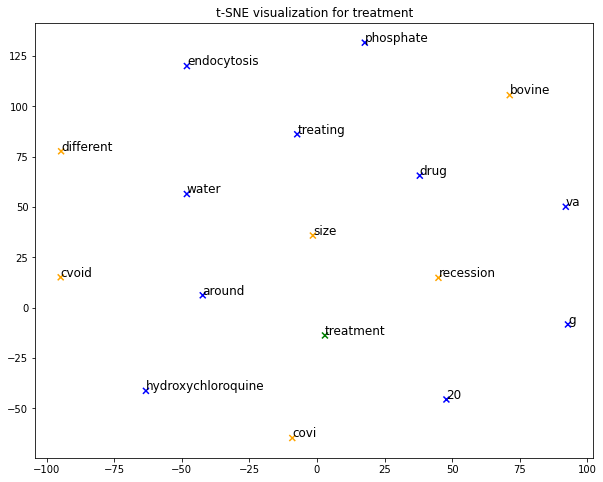

In [66]:
tsne_plot(sg_w2v_model, tsne_word, other_words_tsne)